In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'data/magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[ 0.25216012,  0.4828431 ,  1.203554  , -0.74409663, -0.80769917,
         0.90582709,  0.96523207, -0.54061961,  0.21255439,  1.0651835 ],
       [-0.7836077 , -0.63118582, -1.10882826,  1.31106123,  1.24735764,
        -0.03032125,  0.12119811, -0.38913757,  2.13855625,  0.5002417 ]])

In [4]:
test_Features[:2]

array([[-0.60488411, -0.69414924, -0.59315517,  0.90024846,  0.72974756,
         0.19114162,  0.21974949,  0.25483755,  1.67956954, -1.28354014],
       [-0.61783858, -0.1551364 , -0.15111943, -0.51762994, -0.59413977,
         0.66189464,  0.02716448, -0.41402847, -0.66642725, -0.37741327]])

In [5]:
train_Label[:4]

array([0, 1, 1, 1])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([0, 1, 1, 1])

In [8]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [9]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [11]:
model = Sequential()

In [12]:
model.add(LSTM(units=10, input_shape=(10,1)))

In [13]:
model.add(Dense(1, activation = "sigmoid"))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [16]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=300,verbose=1)

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
13694/13694 [==============================] - 2s 132us/step - loss: 0.6901 - acc: 0.5773 - val_loss: 0.6722 - val_acc: 0.6419
Epoch 2/30
13694/13694 [==============================] - 1s 80us/step - loss: 0.6494 - acc: 0.6483 - val_loss: 0.6309 - val_acc: 0.6426
Epoch 3/30
13694/13694 [==============================] - 1s 67us/step - loss: 0.6146 - acc: 0.6605 - val_loss: 0.6052 - val_acc: 0.6754
Epoch 4/30
13694/13694 [==============================] - 1s 56us/step - loss: 0.5937 - acc: 0.6953 - val_loss: 0.5890 - val_acc: 0.6997
Epoch 5/30
13694/13694 [==============================] - 1s 75us/step - loss: 0.5818 - acc: 0.7063 - val_loss: 0.5780 - val_acc: 0.7050
Epoch 6/30
13694/13694 [==============================] - 1s 82us/step - loss: 0.5715 - acc: 0.7106 - val_loss: 0.5664 - val_acc: 0.7057
Epoch 7/30
13694/13694 [==============================] - 1s 107us/step - loss: 0.5605 - acc: 0.7143 - val_loss: 0.5533 - val_ac

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

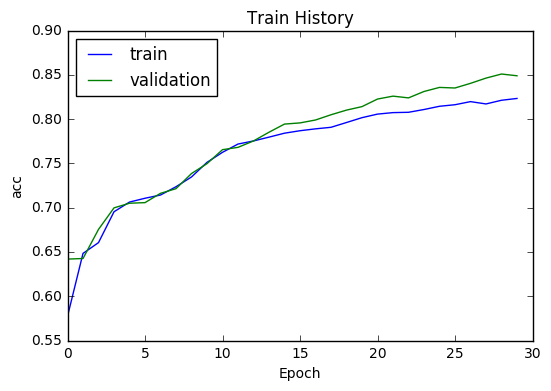

In [18]:
show_train_history(train_history,'acc','val_acc')

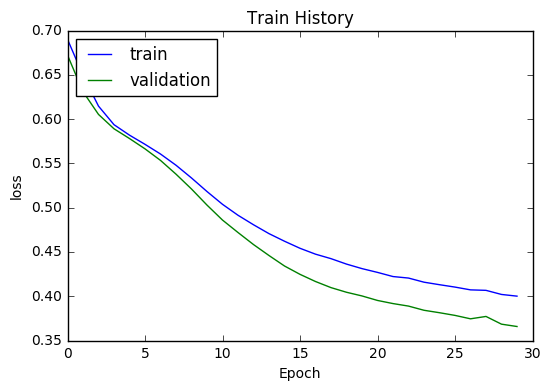

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 1s 236us/step


In [21]:
scores[1]

0.8335962146363926